# Librerias y DataSet

## Librerias

In [148]:
# Imports
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
# Hyperparams
seed = 5

np.random.seed(seed)
tf.random.set_seed(seed)

## DataSet

### Acomodamiento del conjunto de datos

In [150]:
import zipfile
from glob import glob

# Descomprimiendo el archivo zip
ruta_zip = 'path_to\data.zip'
ruta_extraccion = './'
password = None

archivo_zip = zipfile.ZipFile(ruta_zip, "r")

try:
    print(archivo_zip.namelist())
    archivo_zip.extractall(pwd=password, path=ruta_extraccion)
except:
    pass

archivo_zip.close()

# Generacion de los  arrays de las imagnes
ana_files = np.array(sorted(glob('data\\ana\\*')))
print(f'Cantidad de elementos en ana_files -> {len(ana_files)}')

rex_files = np.array(sorted(glob('data\\rex\\*')))
print(f'Cantidad de elementos en rex_files -> {len(rex_files)}')

files = np.append(ana_files, rex_files)
print(f'Cantidad de elementos en files -> {len(files)}')

# Generacion de las labels
labels = []

for file in files:
    if 'ana' in file:
        labels.append('ana')
    else:
        labels.append('rex')

labels = np.array(labels)
print(f'Cantidad de elementos en labels -> {len(labels)}')

['data/', 'data/ana/', 'data/ana/ana (1).jpg', 'data/ana/ana (10).jpg', 'data/ana/ana (100).jpg', 'data/ana/ana (101).jpg', 'data/ana/ana (102).jpg', 'data/ana/ana (103).jpg', 'data/ana/ana (104).jpg', 'data/ana/ana (105).jpg', 'data/ana/ana (106).jpg', 'data/ana/ana (107).jpg', 'data/ana/ana (108).jpg', 'data/ana/ana (109).jpg', 'data/ana/ana (11).jpg', 'data/ana/ana (110).jpg', 'data/ana/ana (111).jpg', 'data/ana/ana (112).jpg', 'data/ana/ana (113).jpg', 'data/ana/ana (114).jpg', 'data/ana/ana (115).jpg', 'data/ana/ana (116).jpg', 'data/ana/ana (117).jpg', 'data/ana/ana (118).jpg', 'data/ana/ana (119).jpg', 'data/ana/ana (12).jpg', 'data/ana/ana (120).jpg', 'data/ana/ana (121).jpg', 'data/ana/ana (122).jpg', 'data/ana/ana (123).jpg', 'data/ana/ana (124).jpg', 'data/ana/ana (125).jpg', 'data/ana/ana (126).jpg', 'data/ana/ana (127).jpg', 'data/ana/ana (128).jpg', 'data/ana/ana (129).jpg', 'data/ana/ana (13).jpg', 'data/ana/ana (130).jpg', 'data/ana/ana (131).jpg', 'data/ana/ana (132).j

Dimension de la imagen: (3000, 4000, 3)


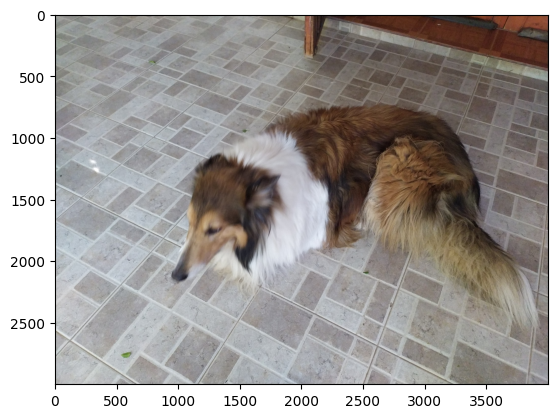

In [151]:
from skimage import io

# Visualizacion rapida de las imagenes
image=io.imread(files[1])/255
print(f'Dimension de la imagen: {image.shape}')
plt.imshow(image,vmin=0,vmax=1)

## Split de los datos

In [152]:
from sklearn.model_selection import train_test_split

# Train/valid/test split
train_valid_files, test_files, train_valid_labels, test_labels = train_test_split(
    files, labels, test_size=0.2, random_state=1234, stratify=labels)

train_files, valid_files, train_labels, valid_labels = train_test_split(
    train_valid_files, train_valid_labels, test_size=0.25, random_state=5678, stratify=train_valid_labels)

print("Train: ", train_files.shape)
print("Valid: ", valid_files.shape)
print("Test: ", test_files.shape)

del train_valid_files, train_valid_labels

Train:  (500,)
Valid:  (167,)
Test:  (167,)


## Construccion de los dataFrames

In [153]:
train_frame = pd.DataFrame(np.array([train_files, train_labels]).T, columns=['files','labels'])
valid_frame = pd.DataFrame(np.array([valid_files, valid_labels]).T, columns=['files','labels'])
test_frame = pd.DataFrame(np.array([test_files, test_labels]).T, columns=['files','labels'])

In [154]:
train_frame

files labels
0    data\rex\rex (168).jpg    rex
1     data\ana\ana (23).jpg    ana
2    data\ana\ana (157).jpg    ana
3    data\ana\ana (139).jpg    ana
4    data\rex\rex (134).jpg    rex
..                      ...    ...
495  data\ana\ana (312).jpg    ana
496   data\ana\ana (51).jpg    ana
497  data\rex\rex (146).jpg    rex
498  data\rex\rex (416).jpg    rex
499  data\rex\rex (353).jpg    rex

[500 rows x 2 columns]

In [155]:
test_frame

files labels
0    data\rex\rex (216).jpg    rex
1    data\rex\rex (446).jpg    rex
2    data\rex\rex (254).jpg    rex
3    data\ana\ana (309).jpg    ana
4    data\rex\rex (111).jpg    rex
..                      ...    ...
162   data\ana\ana (74).jpg    ana
163  data\rex\rex (291).jpg    rex
164  data\ana\ana (141).jpg    ana
165  data\rex\rex (170).jpg    rex
166  data\rex\rex (313).jpg    rex

[167 rows x 2 columns]

In [156]:
valid_frame

files labels
0    data\ana\ana (161).jpg    ana
1    data\ana\ana (118).jpg    ana
2    data\rex\rex (175).jpg    rex
3     data\ana\ana (49).jpg    ana
4     data\ana\ana (27).jpg    ana
..                      ...    ...
162   data\rex\rex (94).jpg    rex
163  data\ana\ana (377).jpg    ana
164  data\ana\ana (332).jpg    ana
165  data\rex\rex (380).jpg    rex
166  data\rex\rex (152).jpg    rex

[167 rows x 2 columns]

# Procesamiento de datos

In [157]:
from keras.preprocessing.image import ImageDataGenerator

# Rescalado o normalización de las  imagenes (0 a 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creamos el iterador, indicando que y como vamos a leer los datos
train_iter = train_datagen.flow_from_dataframe(train_frame,
                                               x_col='files',
                                               y_col='labels',
                                               target_size=(100, 120),
                                               class_mode='categorical',
                                               batch_size=5,
                                               shuffle=True)

valid_iter = valid_datagen.flow_from_dataframe(valid_frame,
                                               x_col='files',
                                               y_col='labels',
                                               target_size=(100, 120),
                                               class_mode='categorical',
                                               batch_size=5,
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame,
                                             x_col='files',
                                             y_col='labels',
                                             target_size=(100, 120),
                                             class_mode='categorical',
                                             batch_size=5,
                                             shuffle=False)

Found 500 validated image filenames belonging to 2 classes.
Found 167 validated image filenames belonging to 2 classes.
Found 167 validated image filenames belonging to 2 classes.


In [158]:
print(test_iter.labels)
print(test_iter.filenames)

[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
['data\\rex\\rex (216).jpg', 'data\\rex\\rex (446).jpg', 'data\\rex\\rex (254).jpg', 'data\\ana\\ana (309).jpg', 'data\\rex\\rex (111).jpg', 'data\\ana\\ana (318).jpg', 'data\\rex\\rex (319).jpg', 'data\\rex\\rex (121).jpg', 'data\\ana\\ana (203).jpg', 'data\\rex\\rex (236).jpg', 'data\\rex\\rex (29).jpg', 'data\\ana\\ana (9).jpg', 'data\\ana\\ana (115).jpg', 'data\\rex\\rex (148).jpg', 'data\\rex\\rex (147).jpg', 'data\\rex\\rex (293).jpg', 'data\\rex\\rex (197).jpg', 'data\\rex\\rex (166).jp

# Red Neuronal

In [159]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Modelado
model = Sequential()

# 1ra capa convolucional
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 120, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2da capa convolucional
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanamineto o flatten
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax'))

# Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 22, 27, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 38016)             0         
                                                                 
 dense_10 (Dense)            (None, 1024)             

## Modelado

In [160]:
# Compilación
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [161]:
train_frame.shape[0]//train_iter.batch_size

100

In [162]:
# Ajuste
history = model.fit(train_iter, steps_per_epoch = train_frame.shape[0]//train_iter.batch_size,
                              epochs=20, validation_data=valid_iter,
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

Epoch 1/20
100/100 [==============================] - 51s 507ms/step - loss: 0.5610 - acc: 0.7280 - val_loss: 0.2935 - val_acc: 0.8606
Epoch 2/20
100/100 [==============================] - 48s 476ms/step - loss: 0.2731 - acc: 0.8860 - val_loss: 0.1067 - val_acc: 0.9758
Epoch 3/20
100/100 [==============================] - 48s 480ms/step - loss: 0.1216 - acc: 0.9700 - val_loss: 0.0315 - val_acc: 0.9939
Epoch 4/20
100/100 [==============================] - 48s 481ms/step - loss: 0.0601 - acc: 0.9820 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 5/20
100/100 [==============================] - 48s 480ms/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 6/20
100/100 [==============================] - 49s 490ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 7/20
100/100 [==============================] - 49s 487ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 8/20
100/100 [==============================] - 4

## Evaluacion

In [163]:
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))

score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

33/33 [==============================] - 9s 279ms/step - loss: 1.0094e-04 - acc: 1.0000
loss en validación: 0.00010094398749060929 
accuracy en validación: 1.0
33/33 [==============================] - 10s 298ms/step - loss: 4.8667e-05 - acc: 1.0000
loss en test: 4.8666555812815204e-05 
accuracy en test: 1.0


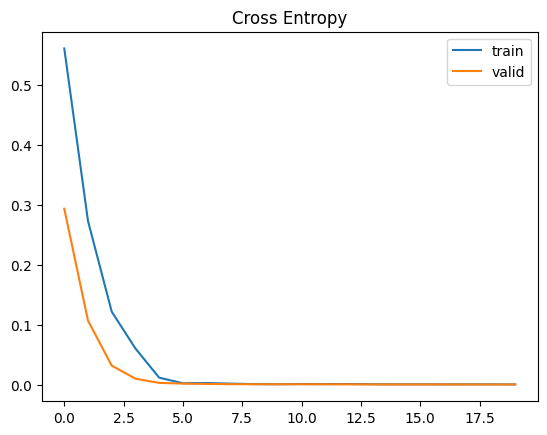

In [164]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

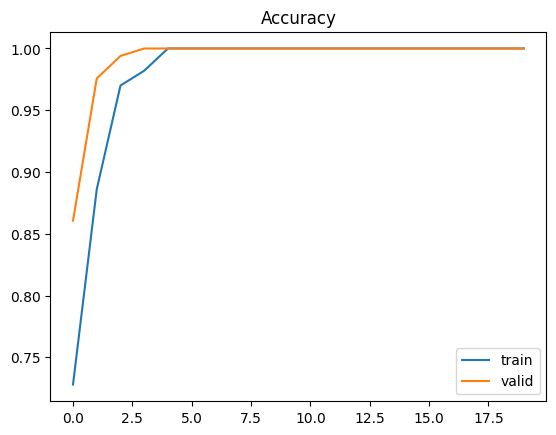

In [165]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

## Prediccion

In [166]:
# Realizamos las predicciones
test_predict = model.predict(test_iter)

print(test_predict.shape)
test_predict

34/34 [==============================] - 9s 276ms/step
(167, 2)


array([[6.72019155e-07, 9.99999285e-01],
       [1.31927693e-04, 9.99868035e-01],
       [5.44802461e-08, 1.00000000e+00],
       [9.99999881e-01, 1.39817672e-07],
       [2.34063364e-08, 1.00000000e+00],
       [9.99999881e-01, 6.78531222e-08],
       [3.46638655e-11, 1.00000000e+00],
       [9.08993627e-07, 9.99999046e-01],
       [9.99888778e-01, 1.11207446e-04],
       [1.35543705e-05, 9.99986410e-01],
       [2.09591455e-08, 1.00000000e+00],
       [9.99991894e-01, 8.07577180e-06],
       [9.99985099e-01, 1.49322150e-05],
       [6.89874658e-14, 1.00000000e+00],
       [8.62870702e-14, 1.00000000e+00],
       [6.20509297e-07, 9.99999404e-01],
       [5.90957995e-07, 9.99999404e-01],
       [6.34131803e-10, 1.00000000e+00],
       [9.99999881e-01, 1.35304916e-07],
       [9.99972939e-01, 2.70502314e-05],
       [1.16034960e-06, 9.99998808e-01],
       [6.84611867e-10, 1.00000000e+00],
       [5.65476785e-06, 9.99994397e-01],
       [9.99279320e-01, 7.20732321e-04],
       [7.110091

In [167]:
# Obtenemos la clase predicha a partir del modelo
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)
predict

array(['1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0',
       '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1'], dtype='<U1')

In [168]:
def decodePredict(label):

    if label == '0':
        return '0 - Ana'
    else:
        return '1 - Rex'

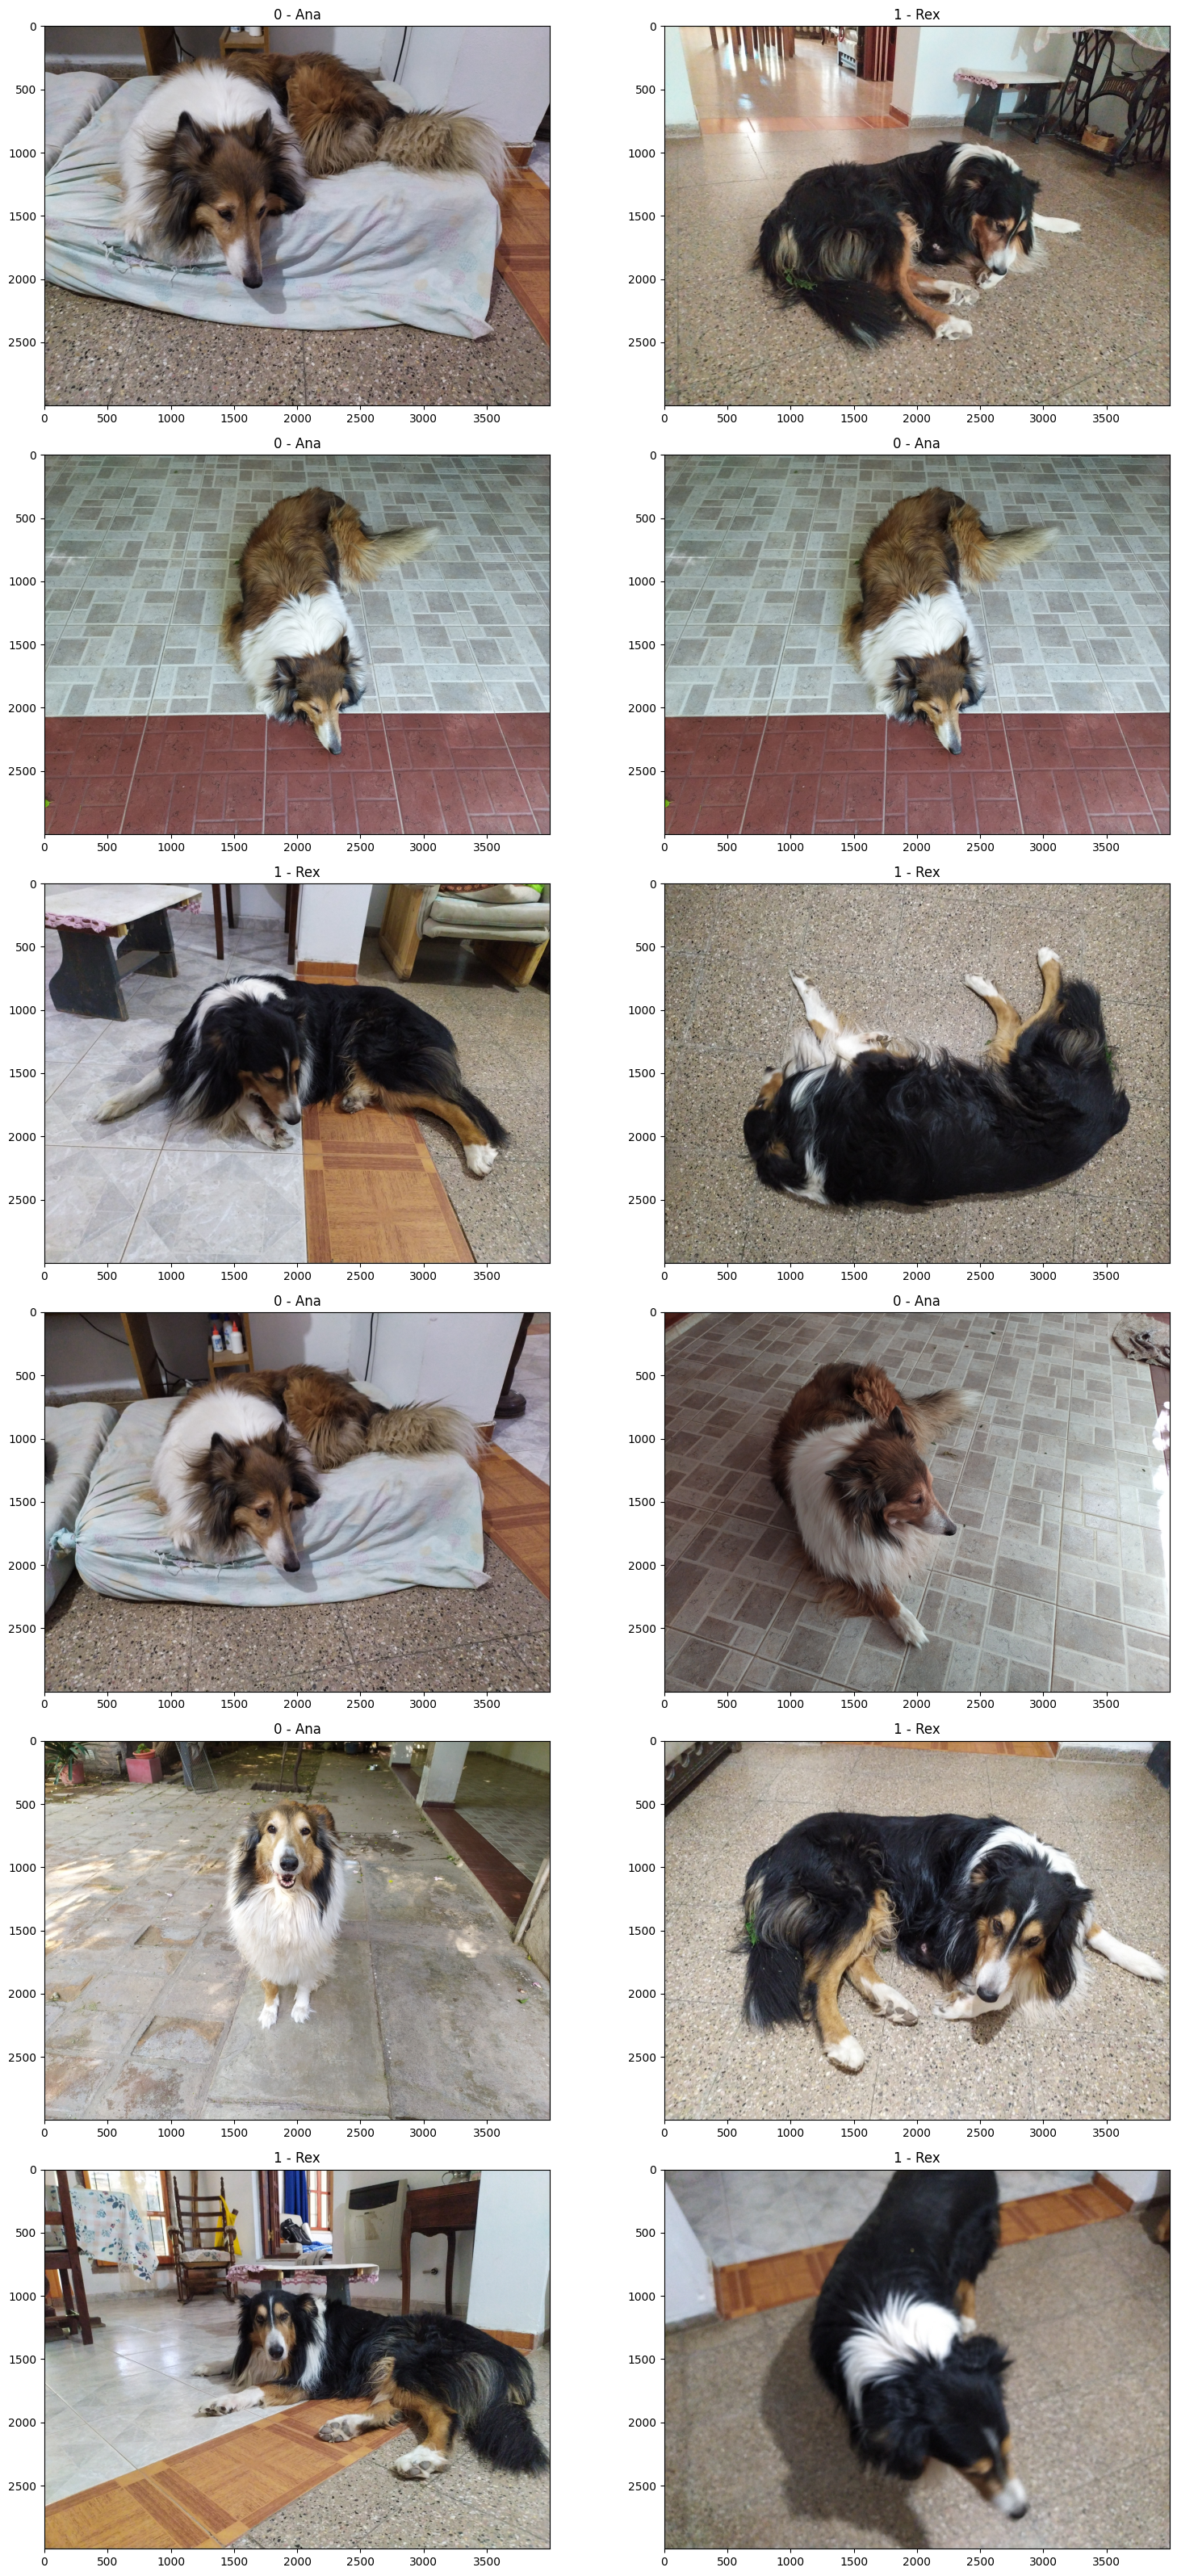

In [169]:
import cv2
import random

fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0

for x in range(6):
    i = random.randint(0, len(predict))

    imagen = cv2.imread(test_frame.iloc[i, 0])
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    axs[count][0].title.set_text(decodePredict(predict[i])) # Configuramos el título
    axs[count][0].imshow(imagen) # Mostramos la MRI

    i = random.randint(0, len(predict))

    imagen = cv2.imread(test_frame.iloc[i, 0])
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    axs[count][1].title.set_text(decodePredict(predict[i])) # Configuramos el título
    axs[count][1].imshow(imagen) # Mostramos la MRI

    count += 1

fig.tight_layout()